In [26]:
# analyst scraping
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
# we need to define the url to which we want to perform web scraping
url = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'

# pandas read html function allows us to retrieve the data from yahoo finance
data_list = pd.read_html(url)



In [2]:
earnings = data_list[0]
earnings.head()

,Earnings Estimate,Current Qtr. (Jun 2020),Next Qtr. (Sep 2020),Current Year (2020),Next Year (2021)
0,No. of Analysts,16.00,16.00,17.00,23.00
1,Avg. Estimate,-0.71,1.45,4.43,11.53
2,Low Estimate,-2.53,0.04,2.27,4.00
3,High Estimate,1.22,2.95,7.83,21.65
4,Year Ago EPS,-1.12,1.86,0.20,4.43


In [3]:
# let's define disagreement as the relative difference between the maximum and minimum rating
disagreement = 100*(earnings['Current Qtr. (Jun 2020)'][3] - earnings['Current Qtr. (Jun 2020)'][2])/earnings['Current Qtr. (Jun 2020)'][3]

In [4]:
disagreement

307.3770491803279

In [5]:
# now that we understand this logic, we need to repeat it for a list of stocks
disagreement_list = []
stock_list = ['TSLA','MSFT','AMZN','GE','MCD','GOOG','FB','AAPL','JNJ','NFLX','KO']
for stock in stock_list:
  print(stock)
  url = 'https://finance.yahoo.com/quote/'+stock+'/analysis?p=' + stock
  data_list = pd.read_html(url)
  earnings = data_list[0]
  disagreement = 100*(earnings['Current Qtr. (Jun 2020)'][3] - earnings['Current Qtr. (Jun 2020)'][2])/earnings['Current Qtr. (Jun 2020)'][3]
  disagreement_list.append([abs(disagreement),stock])

TSLA
MSFT
AMZN
GE
MCD
GOOG
FB
AAPL
JNJ
NFLX
KO


In [6]:
disagreement_list

[[307.3770491803279, 'TSLA'],
 [15.2317880794702, 'MSFT'],
 [168.19484240687677, 'AMZN'],
 [800.0, 'GE'],
 [70.07874015748031, 'MCD'],
 [44.04296875, 'GOOG'],
 [40.12345679012346, 'FB'],
 [37.24696356275304, 'AAPL'],
 [21.301775147928986, 'JNJ'],
 [23.188405797101442, 'NFLX'],
 [35.294117647058826, 'KO']]

In [7]:
# finally turn it into a dataframe
analysts = pd.DataFrame(disagreement_list, columns = ['disagreement%','Symbol'])

In [8]:
# et voilà!
analysts

,disagreement%,Symbol
0,307.377049,TSLA
1,15.231788,MSFT
2,168.194842,AMZN
3,800.000000,GE
4,70.078740,MCD
5,44.042969,GOOG
6,40.123457,FB
7,37.246964,AAPL
8,21.301775,JNJ
9,23.188406,NFLX


In [9]:
# now we need to calculate the volatility for the same list of stocks

# calculate volatility

# we will have to make http requests to an API in python 
import requests


# alpha vantage stock market API
key = 'LD1TS7G1MUG3SD5Q'

inputs = {
  'function' : 'TIME_SERIES_DAILY',
 'symbol' : 'TSLA',
 'apikey' : key   

}
# we can either query the link directly.
# https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=LD1TS7G1MUG3SD5Q

In [10]:
response = requests.get("https://www.alphavantage.co/query",inputs)
# in this line of code we are making the request for these given inputs to alphavantage


In [11]:
# analysing the json response
pd.DataFrame(response.json())

,Meta Data,Time Series (Daily)
1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN
2. Symbol,TSLA,NaN
3. Last Refreshed,2020-07-14,NaN
4. Output Size,Compact,NaN
5. Time Zone,US/Eastern,NaN
...,...,...
2020-02-27,NaN,"{'1. open': '730.0000', '2. high': '739.7700',..."
2020-02-26,NaN,"{'1. open': '782.5000', '2. high': '813.3100',..."
2020-02-25,NaN,"{'1. open': '849.0000', '2. high': '856.6000',..."
2020-02-24,NaN,"{'1. open': '839.0000', '2. high': '863.5000',..."


In [12]:
# hmmm looks like we want the second part of the dataframe

pd.DataFrame(response.json()['Time Series (Daily)'])

,2020-07-14,2020-07-13,2020-07-10,2020-07-09,2020-07-08,2020-07-07,2020-07-06,2020-07-02,2020-07-01,2020-06-30,...,2020-03-05,2020-03-04,2020-03-03,2020-03-02,2020-02-28,2020-02-27,2020-02-26,2020-02-25,2020-02-24,2020-02-21
1. open,1556.0000,1659.0000,1396.0000,1396.9900,1405.0000,1405.0100,1276.6900,1221.4800,1083.0000,1006.5000,...,723.7700,763.9603,805.0000,711.2600,629.7000,730.0000,782.5000,849.0000,839.0000,906.9800
2. high,1590.0000,1794.9900,1548.9200,1408.5600,1417.2600,1429.5000,1377.7900,1228.0000,1135.3300,1087.6900,...,745.7500,766.5200,806.9800,743.6900,690.5200,739.7700,813.3100,856.6000,863.5000,913.0600
3. low,1431.0000,1471.1100,1376.0100,1351.2800,1311.3400,1336.7100,1266.0400,1185.6000,1080.5000,1003.7300,...,718.0700,724.7345,716.1106,686.6700,611.5200,669.0000,776.1100,787.0000,822.2000,880.4500
4. close,1516.8000,1497.0600,1544.6500,1394.2800,1365.8800,1389.8600,1371.5800,1208.6600,1119.6300,1079.8100,...,724.5400,749.5000,745.5100,743.6200,667.9900,679.0000,778.8000,799.9100,833.7900,901.0000
5. volume,22919100,39003200,23346400,11718300,16330200,21493300,20570300,17250100,13326900,16918500,...,10852657,15048977,25784003,20194991,24564171,24277160,14153843,17290481,15192163,14339446


In [28]:
# this is almost great, but we need to pivot the data

data = pd.DataFrame(response.json()['Time Series (Daily)']).T
data['Symbol'] = 'MSFT'

data['4. close'] = pd.to_numeric(data['4. close'])

data

,1. open,2. high,3. low,4. close,5. volume,Symbol
2020-07-14,260.9600,265.3300,240.4500,260.01,8655300,MSFT
2020-07-13,278.6300,281.0000,256.3400,260.30,9293000,MSFT
2020-07-10,271.7700,278.1600,268.6400,275.87,6355100,MSFT
2020-07-09,269.0100,272.7000,264.2200,269.52,5396100,MSFT
2020-07-08,263.8000,268.5300,261.2900,266.32,6013000,MSFT
...,...,...,...,...,...,...
2020-02-27,109.4300,118.0000,107.6000,113.55,13511847,MSFT
2020-02-26,109.9430,111.3000,105.6000,106.88,6885393,MSFT
2020-02-25,108.5200,111.8000,104.4664,107.08,13425942,MSFT
2020-02-24,97.8000,110.0000,97.0200,105.01,12172751,MSFT


In [14]:
# calculating volatility

# we start by calculating the daily returns
data['returns'] = (data['4. close']-data['4. close'].shift(-1))/data['4. close'].shift(-1)

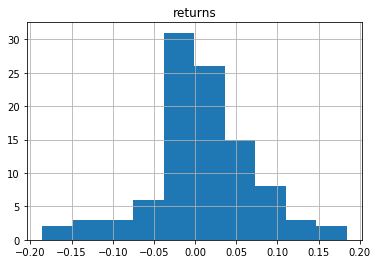

In [15]:
import matplotlib.pyplot as plt

data.head()

# distribution of returns of MSFT stock
data.hist('returns')
plt.show()

In [16]:
# how do we calculate volatility?
data = data.iloc[::-1]
# rolling window calculates standard deviation of past 20 days
data['volatility'] = data['returns'].rolling(20).std()*np.sqrt(250)
data = data.iloc[::-1]

# calculate median to compare if current vol is high or low historically
data['median'] = data['volatility'].agg(np.median)

data.head()

,1. open,2. high,3. low,4. close,5. volume,Symbol,returns,volatility,median
2020-07-14,1556.0000,1590.0000,1431.0000,1516.80,22919100,MSFT,0.013186,0.729531,0.795504
2020-07-13,1659.0000,1794.9900,1471.1100,1497.06,39003200,MSFT,-0.030810,0.740049,0.795504
2020-07-10,1396.0000,1548.9200,1376.0100,1544.65,23346400,MSFT,0.107848,0.748227,0.795504
2020-07-09,1396.9900,1408.5600,1351.2800,1394.28,11718300,MSFT,0.020792,0.725481,0.795504
2020-07-08,1405.0000,1417.2600,1311.3400,1365.88,16330200,MSFT,-0.017254,0.770407,0.795504


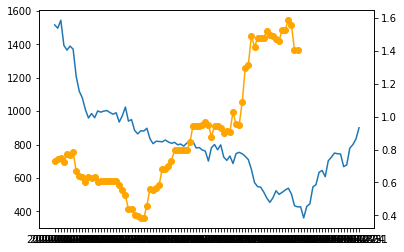

In [17]:

plt.plot(data.index,data['4. close'])
ax = data['volatility'].plot(secondary_y=True, color='orange', marker='o')
plt.show()

In [18]:
# now we repeat this entire process for the same list of stocks -> power of automation of a process
stock_list = stock_list = ['TSLA','MSFT','AMZN','GE','MCD','GOOG','FB','AAPL','JNJ','NFLX','DIS','KO']
import time
#all restuls will end up in here
data_list = []

key = 'P0GDBRI5P9EOK0PW'
for stock in stock_list:
  print(stock)
  time.sleep(1)
  inputs = {'function' : 'TIME_SERIES_DAILY','symbol' : stock,'apikey' : key}
  response = requests.get("https://www.alphavantage.co/query",inputs)
  try:
    data = pd.DataFrame(response.json()['Time Series (Daily)']).T
    data['Symbol'] = stock
    data['4. close'] = pd.to_numeric(data['4. close'])
    data['returns'] = 100*(data['4. close']-data['4. close'].shift(-1))/data['4. close'].shift(-1)
    data = data.iloc[::-1]
    data['volatility'] = data['returns'].rolling(20).std()*np.sqrt(250)
    data['vol_median'] = data['volatility'].agg(np.median)
    data = data.iloc[::-1]
    data_list.append(data)
  except:
    continue

stocks = pd.concat(data_list)

TSLA
MSFT
AMZN
GE
MCD
GOOG
FB
AAPL
JNJ
NFLX
DIS
KO


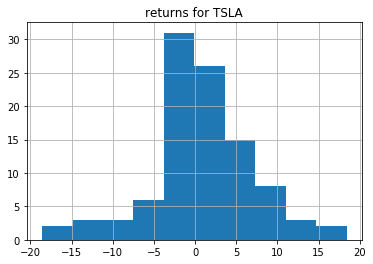

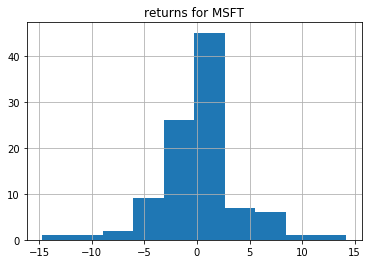

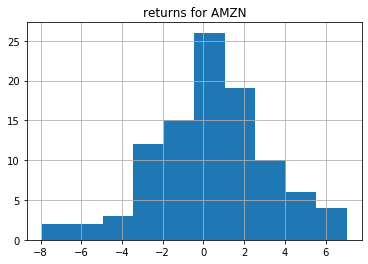

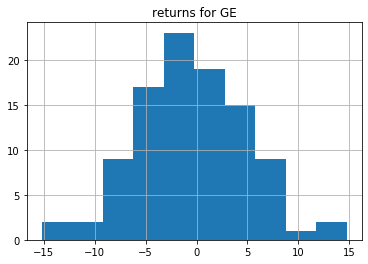

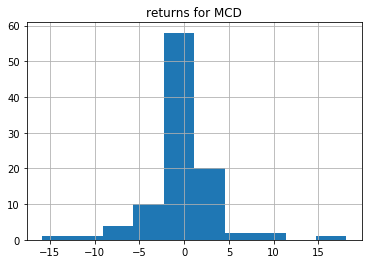

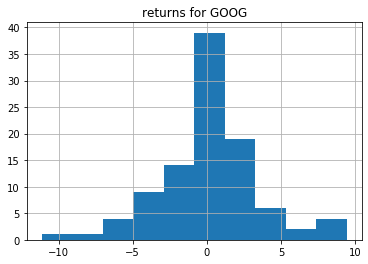

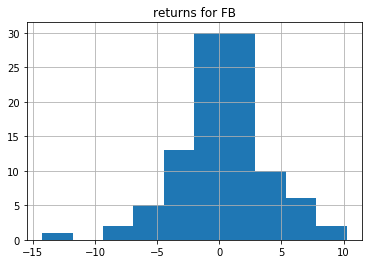

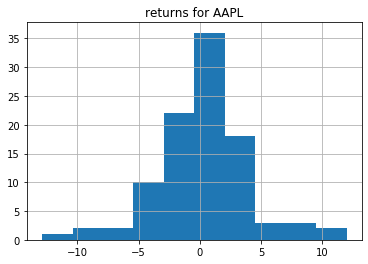

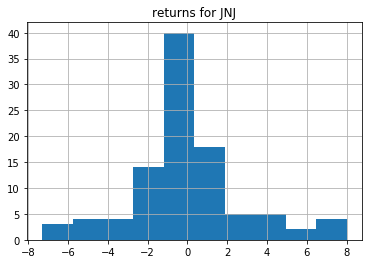

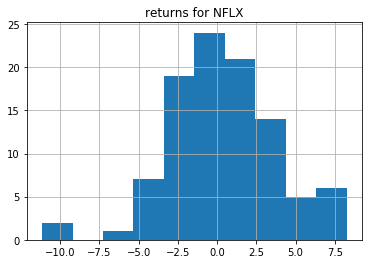

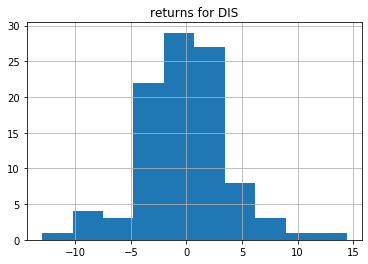

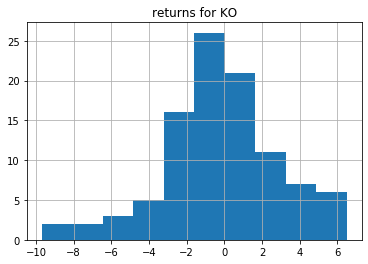

In [19]:
import matplotlib.pyplot as plt

for df in data_list:
  df.hist('returns')
  title = "returns for " +  df['Symbol'].any()
  plt.title(title)
plt.show()

In [20]:
latest_vol = []
for df in data_list:
  latest_vol.append(df.groupby('Symbol').first())

In [21]:
vols = pd.concat(latest_vol)
vols

,1. open,2. high,3. low,4. close,5. volume,returns,volatility,vol_median
Symbol,,,,,,,,
TSLA,1556.0000,1590.0000,1431.0000,1516.80,22919100,1.318584,72.953096,79.550430
MSFT,206.1300,208.8500,202.0300,208.35,36629800,0.618148,25.734355,33.986507
AMZN,3089.0000,3127.3800,2950.0000,3084.00,7118100,-0.644330,34.775567,39.123384
GE,6.6600,6.8900,6.5700,6.88,69207000,2.686567,45.809785,76.332445
MCD,185.0900,190.8400,184.7300,190.72,4093200,3.136491,20.708952,32.038205
GOOG,1490.3100,1522.9500,1483.5000,1520.58,1550000,0.611378,30.618739,42.659298
FB,236.7600,240.3300,232.0300,239.73,23155700,0.305439,42.779360,44.632661
AAPL,379.3600,389.0200,375.5100,388.23,41551000,1.654840,24.858007,32.730619
JNJ,145.3200,148.3900,145.2600,147.92,6776000,1.866263,17.453294,23.237841


In [22]:
# finally we bring everything together!
final = analysts.merge(vols, how = 'inner', left_on = 'Symbol', right_index = True)

final.sort_values('disagreement%',ascending=False)

,disagreement%,Symbol,1. open,2. high,3. low,4. close,5. volume,returns,volatility,vol_median
3,800.000000,GE,6.6600,6.8900,6.5700,6.88,69207000,2.686567,45.809785,76.332445
0,307.377049,TSLA,1556.0000,1590.0000,1431.0000,1516.80,22919100,1.318584,72.953096,79.550430
2,168.194842,AMZN,3089.0000,3127.3800,2950.0000,3084.00,7118100,-0.644330,34.775567,39.123384
4,70.078740,MCD,185.0900,190.8400,184.7300,190.72,4093200,3.136491,20.708952,32.038205
5,44.042969,GOOG,1490.3100,1522.9500,1483.5000,1520.58,1550000,0.611378,30.618739,42.659298
6,40.123457,FB,236.7600,240.3300,232.0300,239.73,23155700,0.305439,42.779360,44.632661
7,37.246964,AAPL,379.3600,389.0200,375.5100,388.23,41551000,1.654840,24.858007,32.730619
10,35.294118,KO,44.9100,45.9400,44.6700,45.87,16982200,1.370166,23.519241,32.863604
9,23.188406,NFLX,517.0800,525.5000,490.4900,524.88,14965300,-0.117983,49.017604,40.435159
8,21.301775,JNJ,145.3200,148.3900,145.2600,147.92,6776000,1.866263,17.453294,23.237841


In [23]:
# strategy -> stocks with volatility below median (cheap vol)
# high disagreement of analysts

# this is only a very simple model!!!

# show tableau dashboard

In [27]:
url="https://www.alphavantage.co/query?"


"""https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo"""


inputs = {
    "function" : "TIME_SERIES_DAILY",
    "symbol" : "ZM",
    "apikey": "KS1FKWJ9GC7F1M5Z"
}

response=requests.get(url,inputs)

print(response)

response = requests.get("https://www.alphavantage.co/query",inputs)


soup= BeautifulSoup(response.content, features= "lxml")

soup_df=pd.DataFrame(soup)

<Response [200]>


KeyError: 0